# Workbook 01 - Solving beams with `sympy`

In [9]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

# Task 01

Create a `Beam` object to analyze a beam with the following attributes:
* 14 ft long
* E, I as symbols
* Vertical supports @:
    * 2 ft, 8 ft, 11 ft
* Loads as follows:
    * Point load: 500 lbs, @ 4 ft
    * Uniform distributed load: 200 lbs/ft starting @ 1 ft, ending @ 10 ft
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection assuming a W12x50 (aka, W310x74). Note: this wide-flange section is from the CISC handbook. If you do not have the CISC handbook (or you are in a country that has a different handbook), use a somewhat similar section.

## Task 01 Response

In [4]:
164e6/25.4**4/12**4

0.019001329863268142

{R1: -26900/27, R2: -13300/9, R3: 4700/27}


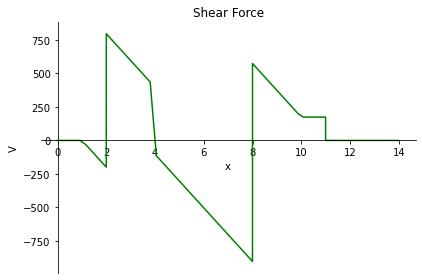

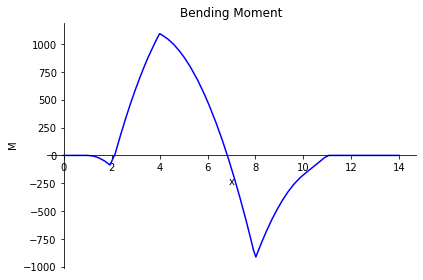

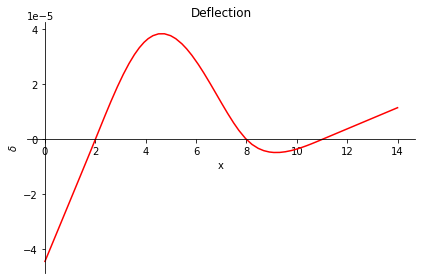

In [10]:
E, I = symbols("E I")
R1, R2, R3 = symbols("R1 R2 R3")

w12x50 = Beam(14, E, I)
w12x50.apply_load(500, 4, -1)
w12x50.apply_load(200, 1, 0, 10)

w12x50.apply_load(R1, 2, -1)
w12x50.apply_load(R2, 8, -1)
w12x50.apply_load(R3, 11, -1)

w12x50.bc_deflection = [(2, 0), (8, 0), (11, 0)]

w12x50.solve_for_reaction_loads(R1, R2, R3)

print(w12x50.reaction_loads)
w12x50.plot_shear_force()
w12x50.plot_bending_moment()
w12x50.plot_deflection(subs={E: 29e6*12**2, I: 164e6/25.4**4/12**4})

## Bonus
How to get shear force at a specific location

In [11]:
x = symbols("x") # The expression is in terms of "x", location along the beam
shear_expr = w12x50.shear_force() # Get the expression for the shear force
shear_expr

-200*SingularityFunction(x, 1, 1) + 26900*SingularityFunction(x, 2, 0)/27 - 500*SingularityFunction(x, 4, 0) + 13300*SingularityFunction(x, 8, 0)/9 + 200*SingularityFunction(x, 10, 1) - 4700*SingularityFunction(x, 11, 0)/27

In [12]:
shear_expr.subs({x: 2.332}) # Substitute a value of x to return the shear force at

729.896296296296

# Task 02

Create a `Beam` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m
    * Point load of 175 kN @ 2.2 m
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all in puts in order for the results to make sense.

## Task 02 Response

In [13]:
b_beam = 300 # mm
d_beam = 600 # mm
gamma_conc = 24.5/1e6 #kN/m**3 = N/1e6 mm**3
w_SW = gamma_conc * b_beam * d_beam # N/mm

{R1: -406876, R2: 802376800}


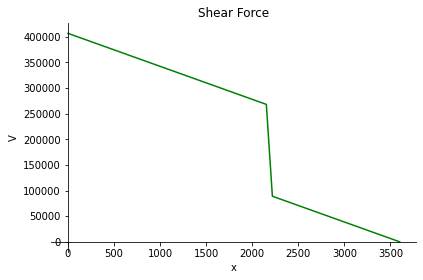

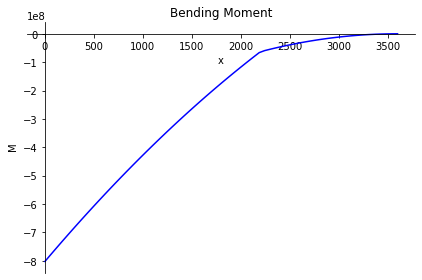

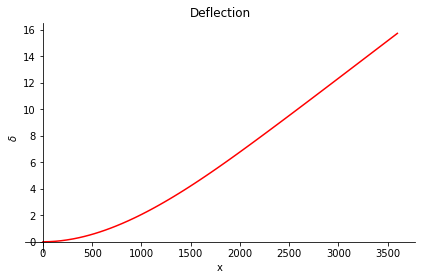

In [14]:
# E, I = symbols("E I")
R1, R2 = symbols("R1 R2")
E = 4500*45**0.5
I = 300*600**3/12

cant_conc = Beam(3600, E, I)
cant_conc.apply_load(60, 0, 0)
cant_conc.apply_load(w_SW, 0, 0)
cant_conc.apply_load(175000, 2200, -1)

cant_conc.apply_load(R1, 0, -1)
cant_conc.apply_load(R2, 0, -2)

cant_conc.bc_deflection = [(0, 0)]
cant_conc.bc_slope = [(0, 0)]

cant_conc.solve_for_reaction_loads(R1, R2)

print(cant_conc.reaction_loads)
cant_conc.plot_shear_force()
cant_conc.plot_bending_moment()
cant_conc.plot_deflection()

# Task 03

Create a `Beam` object to analyze a core footing with the following attributes. You are going to assume a trapezoidal reaction load underneath the footing and solve for it.

* 70 ft x 40 ft (analyze just the long direction)
* 45 MPa concrete, 4 ft deep
* Trapezoidal load as _vertical reaction_
* Loads as follows:
    * Footing self-weight
    * 50 kip @ 12 ft
    * 60 kip @ 30 ft
    * -8000 kip-ft @ 30 ft
    * -7500 kip-ft @ 40 ft
    * 800 kip @ 40 ft
    * 800 kip @ 60 ft    
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams

**Note** You won't be able to assign slope or deflection boundary conditions so you will only be able to solve for reactions, shear, and moment.

**Picture added for solution for clarity**

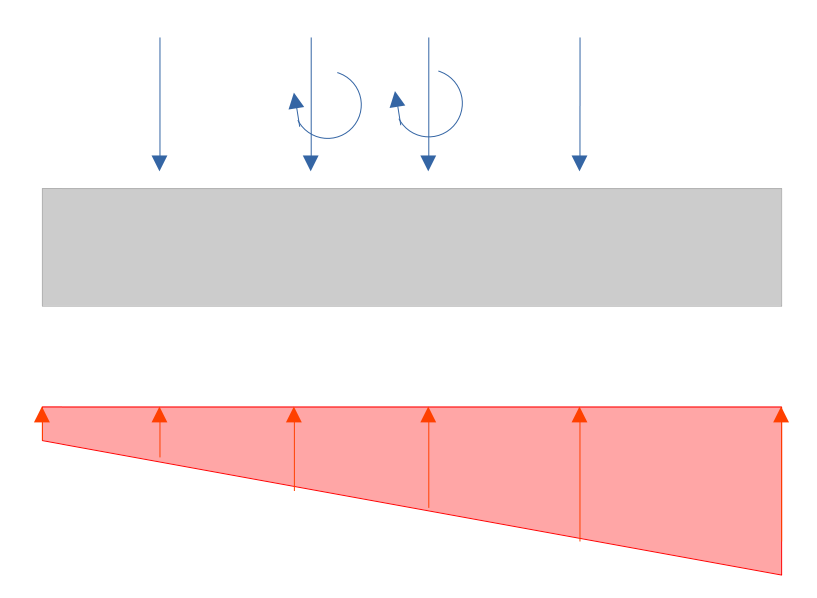

## Task 03 Response

{R1: -90/49, R2: -2283/1715}


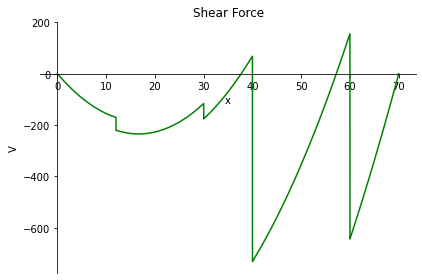

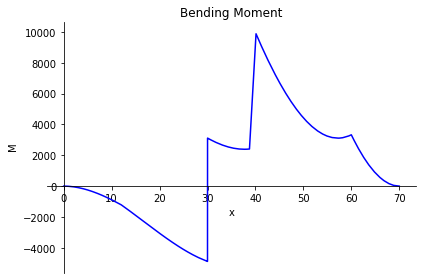

In [15]:
E, I = symbols("E I")
R1, R2 = symbols("R1 R2")
A = 40*4
w_W = A * 150 / 1000 # ft**2 * pcf / (lb/kip) -> kip/ft

core_ftg70 = Beam(70, E, I)
core_ftg70.apply_load(w_W, 0, 0)
core_ftg70.apply_load(50, 12, -1)
core_ftg70.apply_load(60, 30, -1)
core_ftg70.apply_load(-8000, 30, -2)
core_ftg70.apply_load(-7500, 40, -2)
core_ftg70.apply_load(800, 40, -1)
core_ftg70.apply_load(800, 60, -1)

core_ftg70.apply_load(R1, 0, 0)
core_ftg70.apply_load(R2, 0, 1)

core_ftg70.solve_for_reaction_loads(R1, R2)

print(core_ftg70.reaction_loads)

core_ftg70.plot_shear_force()
core_ftg70.plot_bending_moment()

In [16]:
r_min = -90/49
r_slope = -2283/1715
r_max = r_min + r_slope * 70
print(r_min, r_max)

-1.836734693877551 -95.0204081632653
